## Decision Tree Exercises

### Using the Titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

In [113]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
import acquire
import prepare
import split

In [3]:
df = acquire.get_titanic_data()
df = prepare.prep_titanic(df)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,deck,embark_town,alone,embark_town_Queenstown,embark_town_Southampton,sex_male,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0,3,male,22.0,1,0,7.2500,NaN,Southampton,0,0,1,1,0,0,0,0,0,0
1,1,1,female,38.0,1,0,71.2833,C,Cherbourg,0,0,0,0,0,1,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,NaN,Southampton,1,0,1,0,0,0,0,0,0,0
3,1,1,female,35.0,1,0,53.1000,C,Southampton,0,0,1,0,0,1,0,0,0,0
4,0,3,male,35.0,0,0,8.0500,NaN,Southampton,1,0,1,1,0,0,0,0,0,0


In [4]:
train, validate, test = split.train_validate_test_split(df, 'survived')
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,deck,embark_town,alone,embark_town_Queenstown,embark_town_Southampton,sex_male,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
583,0,1,male,36.0,0,0,40.1250,A,Cherbourg,1,0,0,1,0,0,0,0,0,0
165,1,3,male,9.0,0,2,20.5250,NaN,Southampton,0,0,1,1,0,0,0,0,0,0
50,0,3,male,7.0,4,1,39.6875,NaN,Southampton,0,0,1,1,0,0,0,0,0,0
259,1,2,female,50.0,0,1,26.0000,NaN,Southampton,0,0,1,0,0,0,0,0,0,0
306,1,1,female,NaN,0,0,110.8833,NaN,Cherbourg,1,0,0,0,0,0,0,0,0,0


## 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevalant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [5]:
## the baseline prediction is the modal outcome:
survival_odds = df.survived.mean()
non_survival_odds = (1 - survival_odds)

In [6]:
survival_odds

0.3838383838383838

In [7]:
non_survival_odds

0.6161616161616161

In [8]:
if non_survival_odds > survival_odds:
    print("""The baseline prediction is that a given passenger on the Titanic will not survive""")
else:
    print("""The baseline prediction is that a given passenger on the Titanic will not survive""")

The baseline prediction is that a given passenger on the Titanic will not survive


In [9]:
train_baseline = pd.DataFrame(train.survived)
train_baseline

,survived
583,0
165,1
50,0
259,1
306,1
...,...
313,0
636,0
222,0
485,0


In [10]:
train_baseline['baseline'] = 0
train_baseline.head()

,survived,baseline
583,0,0
165,1,0
50,0,0
259,1,0
306,1,0


In [11]:
# model accuracy
(train_baseline.survived == train_baseline.baseline).mean().round(2)

0.62

## 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [12]:
train.isna().sum()

survived                     0
pclass                       0
sex                          0
age                         97
sibsp                        0
parch                        0
fare                         0
deck                       392
embark_town                  1
alone                        0
embark_town_Queenstown       0
embark_town_Southampton      0
sex_male                     0
deck_B                       0
deck_C                       0
deck_D                       0
deck_E                       0
deck_F                       0
deck_G                       0
dtype: int64

In [13]:
#time to drop the unencoded, non-numerical columns
train = train.drop(columns = ['sex', 'deck', 'embark_town'])
validate = validate.drop(columns = ['sex', 'deck', 'embark_town'])
test = test.drop(columns = ['sex', 'deck', 'embark_town'])

train.head()

,survived,pclass,age,sibsp,parch,fare,alone,embark_town_Queenstown,embark_town_Southampton,sex_male,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
583,0,1,36.0,0,0,40.1250,1,0,0,1,0,0,0,0,0,0
165,1,3,9.0,0,2,20.5250,0,0,1,1,0,0,0,0,0,0
50,0,3,7.0,4,1,39.6875,0,0,1,1,0,0,0,0,0,0
259,1,2,50.0,0,1,26.0000,0,0,1,0,0,0,0,0,0,0
306,1,1,NaN,0,0,110.8833,1,0,0,0,0,0,0,0,0,0


In [14]:
imputer = SimpleImputer(strategy='median', missing_values=np.nan)

In [15]:
imputer = imputer.fit(train[['age']])

In [16]:
train[['age']] = imputer.transform(train[['age']])

In [17]:
#now impute age values to take care of nulls 
train[['age']] = imputer.transform(train[['age']])
validate[['age']] = imputer.transform(validate[['age']])
test[['age']] = imputer.transform(test[['age']])

In [18]:
# Classification is supervied ML, so we seperate data and labels
# first we need to split the datasets into x and y versions:
# x version drops 'survived'
# y version is only the survived column

X_train = train.drop(columns = ['survived'])
Y_train = train.survived

X_validate = validate.drop(columns = ['survived'])
Y_validate = validate.survived

X_test = test.drop(columns = ['survived'])
Y_test = test.survived

In [19]:
# now we fit the model to the training data
clf = DecisionTreeClassifier(max_depth=4, random_state=123)

In [20]:
clf = clf.fit(X_train, Y_train)

[Text(462.024, 489.24, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]\nclass = 0'),
 Text(220.96800000000002, 380.52000000000004, 'pclass <= 2.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]\nclass = 1'),
 Text(80.352, 271.8, 'age <= 3.0\ngini = 0.081\nsamples = 94\nvalue = [4, 90]\nclass = 1'),
 Text(40.176, 163.08000000000004, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(120.528, 163.08000000000004, 'fare <= 28.856\ngini = 0.062\nsamples = 93\nvalue = [3, 90]\nclass = 1'),
 Text(80.352, 54.360000000000014, 'gini = 0.133\nsamples = 42\nvalue = [3, 39]\nclass = 1'),
 Text(160.704, 54.360000000000014, 'gini = 0.0\nsamples = 51\nvalue = [0, 51]\nclass = 1'),
 Text(361.584, 271.8, 'fare <= 23.912\ngini = 0.498\nsamples = 81\nvalue = [38, 43]\nclass = 1'),
 Text(281.232, 163.08000000000004, 'age <= 35.0\ngini = 0.476\nsamples = 69\nvalue = [27, 42]\nclass = 1'),
 Text(241.056, 54.360000000000014, 'gini = 0.455\nsamples = 63\nvalue = [22, 41]\nclass = 1'

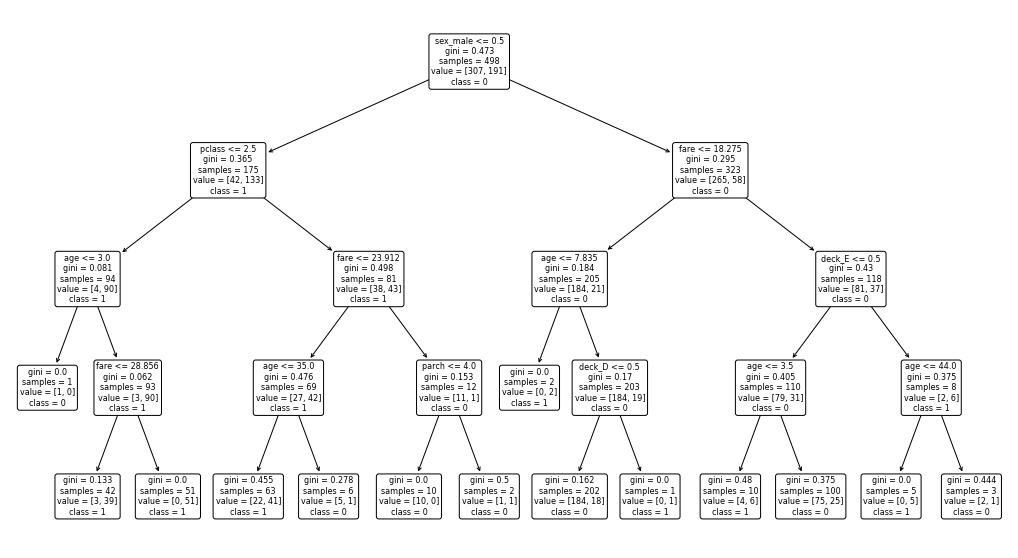

In [21]:
plt.figure(figsize=(18, 10))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_.astype(str), rounded=True)


In [22]:
#make predictions:
survived_prediction = pd.DataFrame(clf.predict(X_train))
survived_prediction.value_counts()

0    324
1    174
dtype: int64

In [23]:
# Predict probability
survival_prediction_proba = pd.DataFrame(clf.predict_proba(X_train))
survival_prediction_proba

,0,1
0,0.750000,0.250000
1,0.750000,0.250000
2,0.750000,0.250000
3,0.071429,0.928571
4,0.000000,1.000000
...,...,...
493,0.910891,0.089109
494,0.910891,0.089109
495,0.910891,0.089109
496,1.000000,0.000000


## 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [24]:
# compute accuracy
print(f"Accuracy of Decision Tree classifer on training set: "\
        f"{clf.score(X_train, Y_train)}")

Accuracy of Decision Tree classifer on training set: 0.8493975903614458


In [25]:
# confusion matrix
confusion_matrix(Y_train, survived_prediction)

array([[278,  29],
       [ 46, 145]])

In [26]:
Y_train.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [27]:
labels = sorted(Y_train.unique())

pd.DataFrame(confusion_matrix(Y_train, survived_prediction), index=labels, columns=labels)

,0,1
0,278,29
1,46,145


In [28]:
#classification report
print(classification_report(Y_train, survived_prediction))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       307
           1       0.83      0.76      0.79       191

    accuracy                           0.85       498
   macro avg       0.85      0.83      0.84       498
weighted avg       0.85      0.85      0.85       498



## 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [29]:
# compute accuracy
print(f"Accuracy of Decision Tree classifer on training set: "\
        f"{clf.score(X_train, Y_train)}")

Accuracy of Decision Tree classifer on training set: 0.8493975903614458


In [30]:
# true positive rate is the same as recall
# Recall (True pos/ true pos + False neg) = 0.91 for deceased passengers, 
# 0.76 for survivors

# Precision (True pos/true pos + False pos) = 0.86 for deceased, 
# 0.83 for survivors

## 5. Run through steps 2-4 using a different max_depth value.

In [31]:
# now we fit the model to the training data
clf = DecisionTreeClassifier(max_depth=5, random_state=123)

clf = clf.fit(X_train, Y_train)

[Text(447.271875, 498.3, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]\nclass = 0'),
 Text(196.17187500000003, 407.70000000000005, 'pclass <= 2.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]\nclass = 1'),
 Text(62.775000000000006, 317.1, 'age <= 3.0\ngini = 0.081\nsamples = 94\nvalue = [4, 90]\nclass = 1'),
 Text(31.387500000000003, 226.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(94.16250000000001, 226.5, 'fare <= 28.856\ngini = 0.062\nsamples = 93\nvalue = [3, 90]\nclass = 1'),
 Text(62.775000000000006, 135.89999999999998, 'fare <= 28.231\ngini = 0.133\nsamples = 42\nvalue = [3, 39]\nclass = 1'),
 Text(31.387500000000003, 45.299999999999955, 'gini = 0.093\nsamples = 41\nvalue = [2, 39]\nclass = 1'),
 Text(94.16250000000001, 45.299999999999955, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(125.55000000000001, 135.89999999999998, 'gini = 0.0\nsamples = 51\nvalue = [0, 51]\nclass = 1'),
 Text(329.56875, 317.1, 'fare <= 23.912\ngin

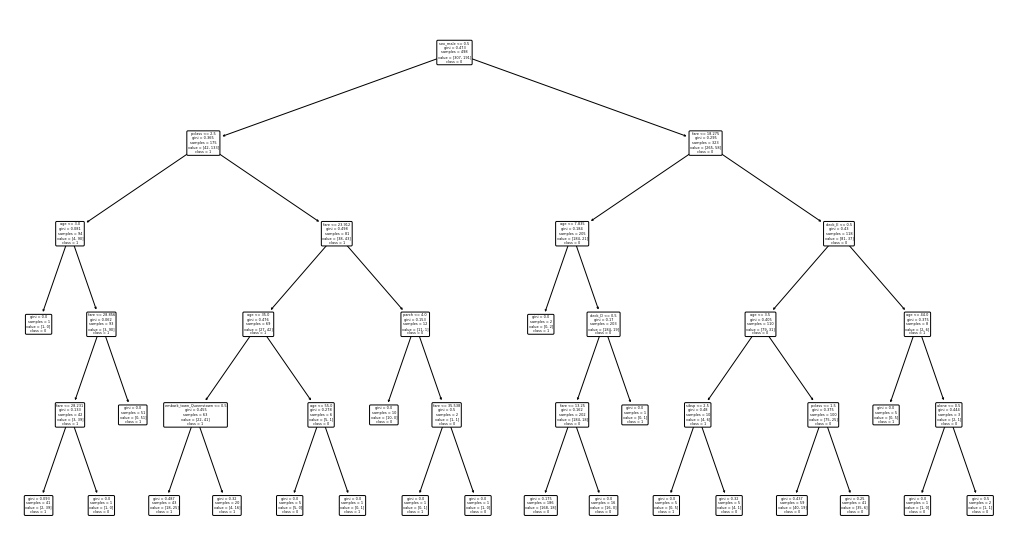

In [32]:
plt.figure(figsize=(18, 10))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_.astype(str), rounded=True)

In [33]:
#make predictions:
survived_prediction = pd.DataFrame(clf.predict(X_train))
survived_prediction.value_counts()

0    328
1    170
dtype: int64

In [34]:
# Predict probability
survival_prediction_proba = pd.DataFrame(clf.predict_proba(X_train))
survival_prediction_proba

,0,1
0,0.677966,0.322034
1,0.853659,0.146341
2,0.853659,0.146341
3,0.048780,0.951220
4,0.000000,1.000000
...,...,...
493,0.903226,0.096774
494,0.903226,0.096774
495,0.903226,0.096774
496,1.000000,0.000000


In [35]:
# compute accuracy
print(f"Accuracy of Decision Tree classifer on training set: "\
        f"{clf.score(X_train, Y_train)}")

Accuracy of Decision Tree classifer on training set: 0.8614457831325302


In [36]:
# confusion matrix
confusion_matrix(Y_train, survived_prediction)

array([[283,  24],
       [ 45, 146]])

In [37]:
Y_train.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [38]:
labels = sorted(Y_train.unique())

pd.DataFrame(confusion_matrix(Y_train, survived_prediction), index=labels, columns=labels)

,0,1
0,283,24
1,45,146


In [39]:
#classification report
print(classification_report(Y_train, survived_prediction))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       307
           1       0.86      0.76      0.81       191

    accuracy                           0.86       498
   macro avg       0.86      0.84      0.85       498
weighted avg       0.86      0.86      0.86       498



## 6. Which model performs better on your in-sample data?

### Scores in sample all improve with additional max_depth (5 vs 4).

## 7. Which model performs best on your out-of-sample data, the validate set?

## A. MAX DEPTH level 5

In [40]:
# MAX DEPTH: 5
# now we fit the model to the validate data
clf = DecisionTreeClassifier(max_depth=5, random_state=123)

clf = clf.fit(X_validate, Y_validate)

[Text(467.5655172413793, 498.3, 'sex_male <= 0.5\ngini = 0.473\nsamples = 214\nvalue = [132, 82]\nclass = 0'),
 Text(233.78275862068966, 407.70000000000005, 'pclass <= 2.5\ngini = 0.419\nsamples = 77\nvalue = [23, 54]\nclass = 1'),
 Text(138.53793103448277, 317.1, 'age <= 55.0\ngini = 0.184\nsamples = 39\nvalue = [4, 35]\nclass = 1'),
 Text(103.90344827586208, 226.5, 'fare <= 28.5\ngini = 0.145\nsamples = 38\nvalue = [3, 35]\nclass = 1'),
 Text(69.26896551724138, 135.89999999999998, 'age <= 37.0\ngini = 0.337\nsamples = 14\nvalue = [3, 11]\nclass = 1'),
 Text(34.63448275862069, 45.299999999999955, 'gini = 0.198\nsamples = 9\nvalue = [1, 8]\nclass = 1'),
 Text(103.90344827586208, 45.299999999999955, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]\nclass = 1'),
 Text(138.53793103448277, 135.89999999999998, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]\nclass = 1'),
 Text(173.17241379310346, 226.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(329.02758620689656, 317.1, 'embark_town

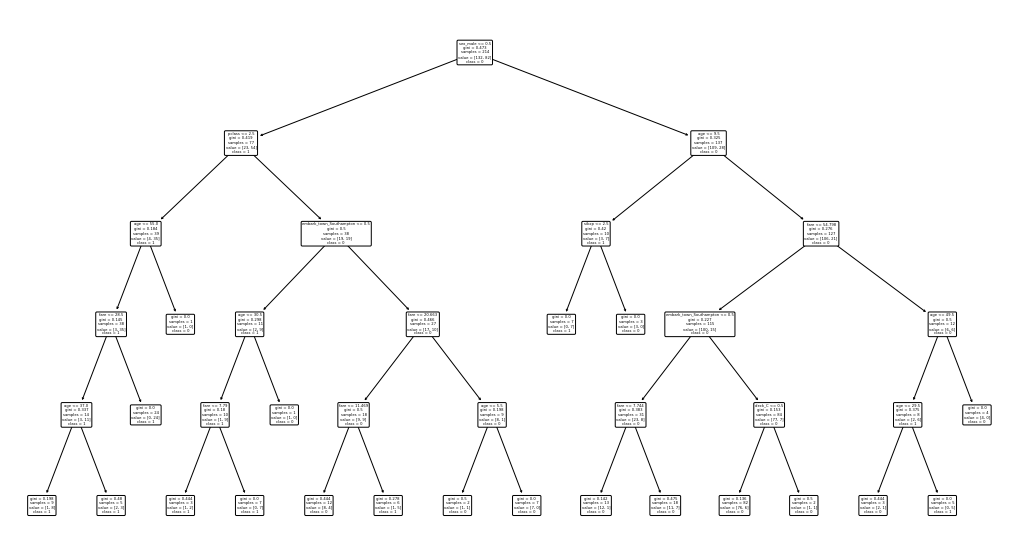

In [41]:
plt.figure(figsize=(18, 10))
plot_tree(clf, feature_names=X_validate.columns, class_names=clf.classes_.astype(str), rounded=True)

In [42]:
#make predictions:
survived_prediction = pd.DataFrame(clf.predict(X_validate))
survived_prediction.value_counts()

0    148
1     66
dtype: int64

In [43]:
# Predict probability
survival_prediction_proba = pd.DataFrame(clf.predict_proba(X_validate))
survival_prediction_proba

,0,1
0,1.000000,0.000000
1,0.926829,0.073171
2,0.923077,0.076923
3,0.000000,1.000000
4,0.926829,0.073171
...,...,...
209,0.926829,0.073171
210,0.926829,0.073171
211,0.000000,1.000000
212,0.400000,0.600000


In [44]:
# compute accuracy
print(f"Accuracy of Decision Tree classifer on validation set: "\
        f"{clf.score(X_validate, Y_validate)}")

Accuracy of Decision Tree classifer on validation set: 0.8785046728971962


In [45]:
# confusion matrix
confusion_matrix(Y_validate, survived_prediction)

array([[127,   5],
       [ 21,  61]])

In [46]:
Y_validate.value_counts()

0    132
1     82
Name: survived, dtype: int64

In [47]:
labels = sorted(Y_validate.unique())

pd.DataFrame(confusion_matrix(Y_validate, survived_prediction), index=labels, columns=labels)

,0,1
0,127,5
1,21,61


In [48]:
#classification report
print(classification_report(Y_validate, survived_prediction))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       132
           1       0.92      0.74      0.82        82

    accuracy                           0.88       214
   macro avg       0.89      0.85      0.87       214
weighted avg       0.88      0.88      0.88       214



## A. MAX DEPTH level 4

[Text(479.3727272727273, 489.24, 'sex_male <= 0.5\ngini = 0.473\nsamples = 214\nvalue = [132, 82]\nclass = 0'),
 Text(251.10000000000002, 380.52000000000004, 'pclass <= 2.5\ngini = 0.419\nsamples = 77\nvalue = [23, 54]\nclass = 1'),
 Text(136.96363636363637, 271.8, 'age <= 55.0\ngini = 0.184\nsamples = 39\nvalue = [4, 35]\nclass = 1'),
 Text(91.30909090909091, 163.08000000000004, 'fare <= 28.5\ngini = 0.145\nsamples = 38\nvalue = [3, 35]\nclass = 1'),
 Text(45.654545454545456, 54.360000000000014, 'gini = 0.337\nsamples = 14\nvalue = [3, 11]\nclass = 1'),
 Text(136.96363636363637, 54.360000000000014, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]\nclass = 1'),
 Text(182.61818181818182, 163.08000000000004, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(365.23636363636365, 271.8, 'embark_town_Southampton <= 0.5\ngini = 0.5\nsamples = 38\nvalue = [19, 19]\nclass = 0'),
 Text(273.92727272727274, 163.08000000000004, 'age <= 30.5\ngini = 0.298\nsamples = 11\nvalue = [2, 9]\nclass = 

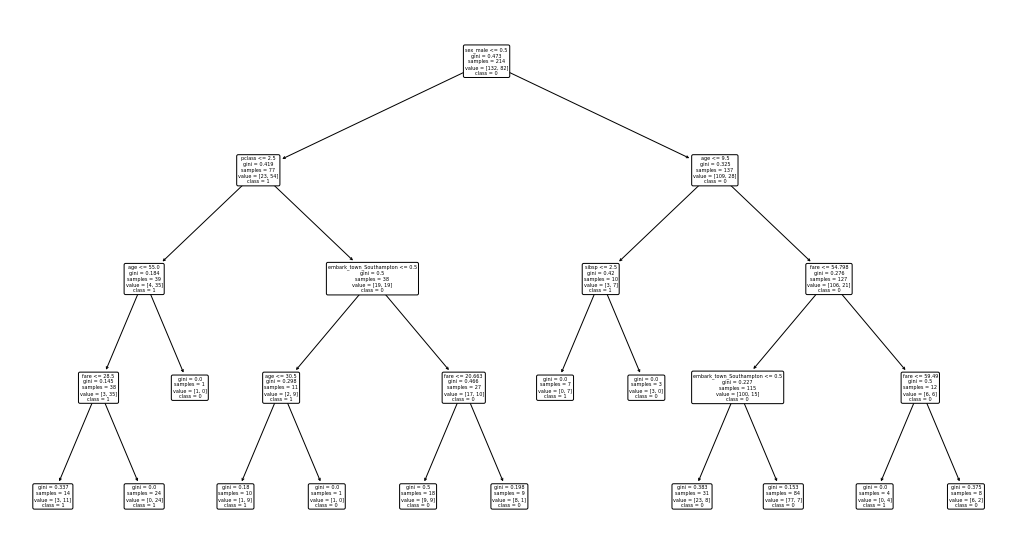

In [49]:
# MAX DEPTH: 4
# now we fit the model to the validate data
clf = DecisionTreeClassifier(max_depth=4, random_state=123)

clf = clf.fit(X_validate, Y_validate)

plt.figure(figsize=(18, 10))
plot_tree(clf, feature_names=X_validate.columns, class_names=clf.classes_.astype(str), rounded=True)

In [50]:
#make predictions:
survived_prediction = pd.DataFrame(clf.predict(X_validate))
survived_prediction.value_counts()

0    155
1     59
dtype: int64

In [51]:
# Predict probability
survival_prediction_proba = pd.DataFrame(clf.predict_proba(X_validate))
survival_prediction_proba

,0,1
0,0.888889,0.111111
1,0.916667,0.083333
2,0.741935,0.258065
3,0.000000,1.000000
4,0.916667,0.083333
...,...,...
209,0.916667,0.083333
210,0.916667,0.083333
211,0.750000,0.250000
212,0.214286,0.785714


In [52]:
# compute accuracy
print(f"Accuracy of Decision Tree classifer on validation set: "\
        f"{clf.score(X_validate, Y_validate)}")

Accuracy of Decision Tree classifer on validation set: 0.8551401869158879


In [53]:
# confusion matrix
confusion_matrix(Y_validate, survived_prediction)

Y_validate.value_counts()

labels = sorted(Y_validate.unique())

pd.DataFrame(confusion_matrix(Y_validate, survived_prediction), index=labels, columns=labels)

,0,1
0,128,4
1,27,55


In [54]:
#classification report
print(classification_report(Y_validate, survived_prediction))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       132
           1       0.93      0.67      0.78        82

    accuracy                           0.86       214
   macro avg       0.88      0.82      0.84       214
weighted avg       0.87      0.86      0.85       214



## Takeaway:

- 5 levels of depth is more accurate than 4 levels in this case:
    - 88% vs 85.5%

# TELCO Churn Exercises

## 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [55]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import seaborn as sns

import acquire
import prepare
import split

In [56]:
df = acquire.get_telco_data()
df.head()
df.columns

Index(['internet_service_type_id', 'payment_type_id', 'contract_type_id',
       'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'payment_type',
       'internet_service_type'],
      dtype='object')

In [57]:
df = prepare.prep_telco(df)
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_Fiber optic,internet_service_type_None
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,0,1,0,1,0,0,0,1,0,0
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,1,0,0,0,0,0,0,1,0,0
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,0,1,1,0,0,0,1,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,1,1,0,0,0,1,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,0,1,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,Yes,No,...,0,0,0,1,0,0,0,1,0,0
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,No,...,1,1,1,0,0,0,1,0,1,0
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,No,Yes,...,0,1,0,0,0,0,0,1,0,0
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,Yes,No,...,1,0,0,0,1,0,0,1,0,0


In [58]:
df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'payment_type',
       'internet_service_type', 'senior_citizen', 'gender_Male', 'partner_Yes',
       'dependents_Yes', 'phone_service_Yes',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'paperless_billing_Yes', 'churn_Yes', 'cont

In [59]:
#drop all the unencoded columns
df = df.drop(columns=['customer_id', 'churn', 'gender', 'senior_citizen', 'partner', 'dependents', 
                      'phone_service', 'multiple_lines', 'online_security',
                       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
                       'streaming_movies', 'paperless_billing', 'monthly_charges',
                       'total_charges', 'contract_type', 'payment_type',
                       'internet_service_type', 'senior_citizen'])

In [60]:
df.head()

,tenure,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_Fiber optic,internet_service_type_None
0,9,0,1,1,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,9,1,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,4,1,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,1,0
3,13,1,1,0,1,0,0,0,0,0,...,1,1,1,0,0,0,1,0,1,0
4,3,0,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,0


In [61]:
# time to split into train, validate and test sets
train, validate, test = split.train_validate_test_split(df, 'churn_Yes')
train.head()

,tenure,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_Fiber optic,internet_service_type_None
5919,58,0,0,0,1,0,1,0,1,0,...,0,1,0,1,0,1,0,0,0,0
1915,71,1,0,1,1,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
5054,35,0,1,1,1,0,1,1,0,1,...,0,1,0,0,0,0,1,0,0,1
2355,1,1,1,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1
6279,20,1,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0


In [62]:
## the baseline prediction is the modal outcome:
churn_odds = train.churn_Yes.mean()
non_churn_odds = (1 - churn_odds)

In [63]:
churn_odds

0.2656845313690627

In [64]:
non_churn_odds

0.7343154686309372

In [65]:
if non_churn_odds > churn_odds:
    print("""The baseline prediction is that a given customer will not churn""")
else:
    print("""The baseline prediction is that a given customer will churn""")

The baseline prediction is that a given customer will not churn


In [66]:
train_baseline = pd.DataFrame(train.churn_Yes)
train_baseline

,churn_Yes
5919,0
1915,0
5054,0
2355,0
6279,0
...,...
394,0
3763,1
3444,0
1002,0


In [67]:
train_baseline['baseline'] = 0
train_baseline.head()

,churn_Yes,baseline
5919,0,0
1915,0,0
5054,0,0
2355,0,0
6279,0,0


In [68]:
# model accuracy
(train_baseline.churn_Yes == train_baseline.baseline).mean()

0.7343154686309372

## 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [69]:
train.isna().sum()

tenure                                   0
gender_Male                              0
partner_Yes                              0
dependents_Yes                           0
phone_service_Yes                        0
multiple_lines_No phone service          0
multiple_lines_Yes                       0
online_security_No internet service      0
online_security_Yes                      0
online_backup_No internet service        0
online_backup_Yes                        0
device_protection_No internet service    0
device_protection_Yes                    0
tech_support_No internet service         0
tech_support_Yes                         0
streaming_tv_No internet service         0
streaming_tv_Yes                         0
streaming_movies_No internet service     0
streaming_movies_Yes                     0
paperless_billing_Yes                    0
churn_Yes                                0
contract_type_One year                   0
contract_type_Two year                   0
payment_typ

In [70]:
train.columns

Index(['tenure', 'gender_Male', 'partner_Yes', 'dependents_Yes',
       'phone_service_Yes', 'multiple_lines_No phone service',
       'multiple_lines_Yes', 'online_security_No internet service',
       'online_security_Yes', 'online_backup_No internet service',
       'online_backup_Yes', 'device_protection_No internet service',
       'device_protection_Yes', 'tech_support_No internet service',
       'tech_support_Yes', 'streaming_tv_No internet service',
       'streaming_tv_Yes', 'streaming_movies_No internet service',
       'streaming_movies_Yes', 'paperless_billing_Yes', 'churn_Yes',
       'contract_type_One year', 'contract_type_Two year',
       'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check', 'internet_service_type_Fiber optic',
       'internet_service_type_None'],
      dtype='object')

In [71]:
#imputer = SimpleImputer(strategy='median', missing_values=np.nan)

In [72]:
#imputer = imputer.fit(train[['age']])

In [73]:
#train[['age']] = imputer.transform(train[['age']])

In [74]:
#now impute age values to take care of nulls 
# train[['age']] = imputer.transform(train[['age']])
# validate[['age']] = imputer.transform(validate[['age']])
# test[['age']] = imputer.transform(test[['age']])

In [75]:
# Classification is supervied ML, so we seperate data and labels
# first we need to split the datasets into x and y versions:
# x version drops 'survived'
# y version is only the survived column

X_train = train.drop(columns = ['churn_Yes'])
Y_train = train.churn_Yes

X_validate = validate.drop(columns = ['churn_Yes'])
Y_validate = validate.churn_Yes

X_test = test.drop(columns = ['churn_Yes'])
Y_test = test.churn_Yes

In [76]:
# now we fit the model to the training data
clf = DecisionTreeClassifier(max_depth=4, random_state=123)

In [77]:
clf = clf.fit(X_train, Y_train)

In [112]:
#plt.figure(figsize=(18, 10))
#plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_.astype(str), rounded=True)


In [79]:
#make predictions:
churn_prediction = pd.DataFrame(clf.predict(X_train))
churn_prediction.value_counts()

0    3173
1     764
dtype: int64

In [80]:
# Predict probability
churn_prediction_proba = pd.DataFrame(clf.predict_proba(X_train))
churn_prediction_proba

,0,1
0,0.935108,0.064892
1,0.780781,0.219219
2,0.935108,0.064892
3,0.725490,0.274510
4,0.935108,0.064892
...,...,...
3932,0.547667,0.452333
3933,0.268868,0.731132
3934,0.990783,0.009217
3935,0.547667,0.452333


## 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [81]:
# compute accuracy
print(f"Accuracy of Decision Tree classifer on training set: "\
        f"{clf.score(X_train, Y_train)}")

Accuracy of Decision Tree classifer on training set: 0.7993395986791973


In [82]:
# confusion matrix
confusion_matrix(Y_train, churn_prediction)

array([[2637,  254],
       [ 536,  510]])

In [83]:
Y_train.value_counts()

0    2891
1    1046
Name: churn_Yes, dtype: int64

In [84]:
labels = sorted(Y_train.unique())

pd.DataFrame(confusion_matrix(Y_train, churn_prediction), index=labels, columns=labels)

,0,1
0,2637,254
1,536,510


In [85]:
#classification report
print(classification_report(Y_train, churn_prediction))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      2891
           1       0.67      0.49      0.56      1046

    accuracy                           0.80      3937
   macro avg       0.75      0.70      0.72      3937
weighted avg       0.79      0.80      0.79      3937



## 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [86]:
# compute accuracy
print(f"Accuracy of Decision Tree classifer on training set: "\
        f"{clf.score(X_train, Y_train)}")

Accuracy of Decision Tree classifer on training set: 0.7993395986791973


In [87]:
# true positive rate is the same as recall
# Recall (True pos/ true pos + False neg) = 0.91 for churned, 
# 0.49 for non-churned

# Precision (True pos/true pos + False pos) = 0.83 for churned, 
# 0.67 for non-churned

## 5. Run through steps 2-4 using a different max_depth value.

In [88]:
# now we fit the model to the training data
clf = DecisionTreeClassifier(max_depth=5, random_state=123)

clf = clf.fit(X_train, Y_train)

[Text(502.20000000000005, 498.3, 'tenure <= 15.5\ngini = 0.39\nsamples = 3937\nvalue = [2891, 1046]\nclass = 0'),
 Text(251.10000000000002, 407.70000000000005, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.498\nsamples = 1371\nvalue = [733, 638]\nclass = 0'),
 Text(125.55000000000001, 317.1, 'tenure <= 3.5\ngini = 0.416\nsamples = 804\nvalue = [567, 237]\nclass = 0'),
 Text(62.775000000000006, 226.5, 'streaming_movies_No internet service <= 0.5\ngini = 0.491\nsamples = 356\nvalue = [202, 154]\nclass = 0'),
 Text(31.387500000000003, 135.89999999999998, 'tech_support_Yes <= 0.5\ngini = 0.495\nsamples = 203\nvalue = [91, 112]\nclass = 1'),
 Text(15.693750000000001, 45.299999999999955, 'gini = 0.483\nsamples = 174\nvalue = [71, 103]\nclass = 1'),
 Text(47.081250000000004, 45.299999999999955, 'gini = 0.428\nsamples = 29\nvalue = [20, 9]\nclass = 0'),
 Text(94.16250000000001, 135.89999999999998, 'tenure <= 1.5\ngini = 0.398\nsamples = 153\nvalue = [111, 42]\nclass = 0'),
 Text(78.46875

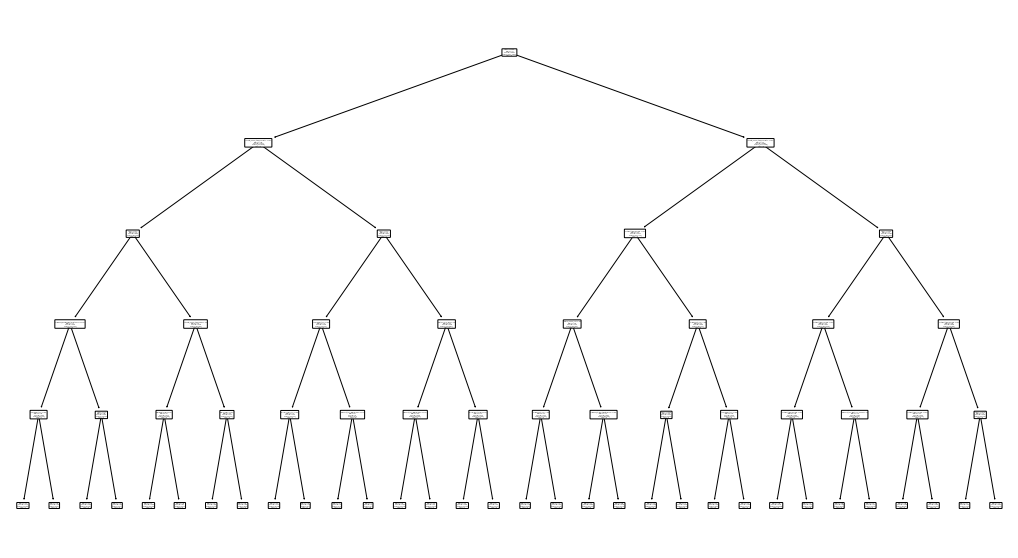

In [89]:
plt.figure(figsize=(18, 10))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_.astype(str), rounded=True)

In [90]:
#make predictions:
churn_prediction = pd.DataFrame(clf.predict(X_train))
churn_prediction.value_counts()

0    3252
1     685
dtype: int64

In [91]:
# Predict probability
churn_prediction_proba = pd.DataFrame(clf.predict_proba(X_train))
churn_prediction_proba

,0,1
0,0.911227,0.088773
1,0.825641,0.174359
2,0.977064,0.022936
3,0.656863,0.343137
4,0.911227,0.088773
...,...,...
3932,0.531915,0.468085
3933,0.500000,0.500000
3934,0.979899,0.020101
3935,0.531915,0.468085


In [92]:
# compute accuracy
print(f"Accuracy of Decision Tree classifer on training set: "\
        f"{clf.score(X_train, Y_train)}")

Accuracy of Decision Tree classifer on training set: 0.8036576073152146


In [93]:
# confusion matrix
confusion_matrix(Y_train, churn_prediction)

array([[2685,  206],
       [ 567,  479]])

In [94]:
Y_train.value_counts()

0    2891
1    1046
Name: churn_Yes, dtype: int64

In [95]:
labels = sorted(Y_train.unique())

pd.DataFrame(confusion_matrix(Y_train, churn_prediction), index=['no churn','churn'], columns=['no churn','churn'])

,no churn,churn
no churn,2685,206
churn,567,479


In [96]:
#classification report
print(classification_report(Y_train, churn_prediction))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87      2891
           1       0.70      0.46      0.55      1046

    accuracy                           0.80      3937
   macro avg       0.76      0.69      0.71      3937
weighted avg       0.79      0.80      0.79      3937



## 6. Which model performs better on your in-sample data?

### Scores in sample all improve with additional max_depth (5 vs 4).

## 7. Which model performs best on your out-of-sample data, the validate set?

## A. MAX DEPTH level 5

In [97]:
# MAX DEPTH: 5
# now we fit the model to the validate data
clf = DecisionTreeClassifier(max_depth=5, random_state=123)

clf = clf.fit(X_validate, Y_validate)

[Text(525.2175000000001, 498.3, 'payment_type_Electronic check <= 0.5\ngini = 0.39\nsamples = 1688\nvalue = [1239, 449]\nclass = 0'),
 Text(267.84000000000003, 407.70000000000005, 'tenure <= 16.5\ngini = 0.274\nsamples = 1106\nvalue = [925, 181]\nclass = 0'),
 Text(133.92000000000002, 317.1, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.44\nsamples = 343\nvalue = [231, 112]\nclass = 0'),
 Text(66.96000000000001, 226.5, 'tenure <= 2.5\ngini = 0.353\nsamples = 245\nvalue = [189, 56]\nclass = 0'),
 Text(33.480000000000004, 135.89999999999998, 'paperless_billing_Yes <= 0.5\ngini = 0.465\nsamples = 79\nvalue = [50, 29]\nclass = 0'),
 Text(16.740000000000002, 45.299999999999955, 'gini = 0.369\nsamples = 45\nvalue = [34, 11]\nclass = 0'),
 Text(50.220000000000006, 45.299999999999955, 'gini = 0.498\nsamples = 34\nvalue = [16, 18]\nclass = 1'),
 Text(100.44000000000001, 135.89999999999998, 'streaming_tv_Yes <= 0.5\ngini = 0.272\nsamples = 166\nvalue = [139, 27]\nclass = 0'),
 Text(83.7000

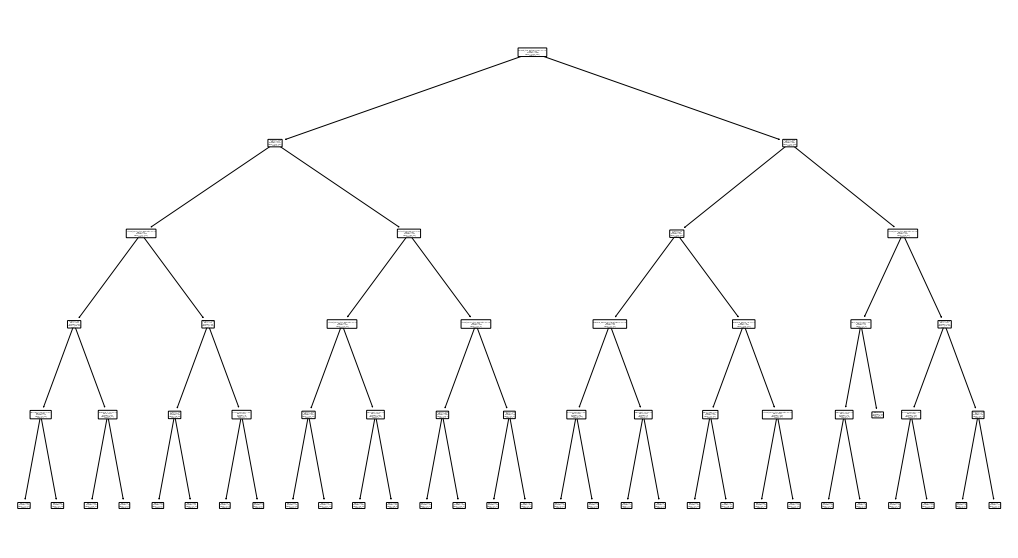

In [98]:
plt.figure(figsize=(18, 10))
plot_tree(clf, feature_names=X_validate.columns, class_names=clf.classes_.astype(str), rounded=True)

In [99]:
#make predictions:
churn_prediction = pd.DataFrame(clf.predict(X_validate))
churn_prediction.value_counts()

0    1393
1     295
dtype: int64

In [100]:
# Predict probability
churn_prediction_proba = pd.DataFrame(clf.predict_proba(X_validate))
churn_prediction_proba

,0,1
0,0.733333,0.266667
1,1.000000,0.000000
2,1.000000,0.000000
3,0.960000,0.040000
4,1.000000,0.000000
...,...,...
1683,0.911111,0.088889
1684,0.733333,0.266667
1685,1.000000,0.000000
1686,0.576923,0.423077


In [101]:
# compute accuracy
print(f"Accuracy of Decision Tree classifer on validation set: "\
        f"{clf.score(X_validate, Y_validate)}")

Accuracy of Decision Tree classifer on validation set: 0.7985781990521327


In [102]:
# confusion matrix
confusion_matrix(Y_validate, churn_prediction)

array([[1146,   93],
       [ 247,  202]])

In [103]:
Y_validate.value_counts()

0    1239
1     449
Name: churn_Yes, dtype: int64

In [104]:
labels = sorted(Y_validate.unique())

pd.DataFrame(confusion_matrix(Y_validate, churn_prediction), index=labels, columns=labels)

,0,1
0,1146,93
1,247,202


In [105]:
#classification report
print(classification_report(Y_validate, churn_prediction))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1239
           1       0.68      0.45      0.54       449

    accuracy                           0.80      1688
   macro avg       0.75      0.69      0.71      1688
weighted avg       0.79      0.80      0.78      1688



## A. MAX DEPTH level 4

[Text(502.20000000000005, 489.24, 'payment_type_Electronic check <= 0.5\ngini = 0.39\nsamples = 1688\nvalue = [1239, 449]\nclass = 0'),
 Text(251.10000000000002, 380.52000000000004, 'tenure <= 16.5\ngini = 0.274\nsamples = 1106\nvalue = [925, 181]\nclass = 0'),
 Text(125.55000000000001, 271.8, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.44\nsamples = 343\nvalue = [231, 112]\nclass = 0'),
 Text(62.775000000000006, 163.08000000000004, 'tenure <= 2.5\ngini = 0.353\nsamples = 245\nvalue = [189, 56]\nclass = 0'),
 Text(31.387500000000003, 54.360000000000014, 'gini = 0.465\nsamples = 79\nvalue = [50, 29]\nclass = 0'),
 Text(94.16250000000001, 54.360000000000014, 'gini = 0.272\nsamples = 166\nvalue = [139, 27]\nclass = 0'),
 Text(188.32500000000002, 163.08000000000004, 'tenure <= 15.5\ngini = 0.49\nsamples = 98\nvalue = [42, 56]\nclass = 1'),
 Text(156.9375, 54.360000000000014, 'gini = 0.475\nsamples = 90\nvalue = [35, 55]\nclass = 1'),
 Text(219.71250000000003, 54.360000000000014, 'g

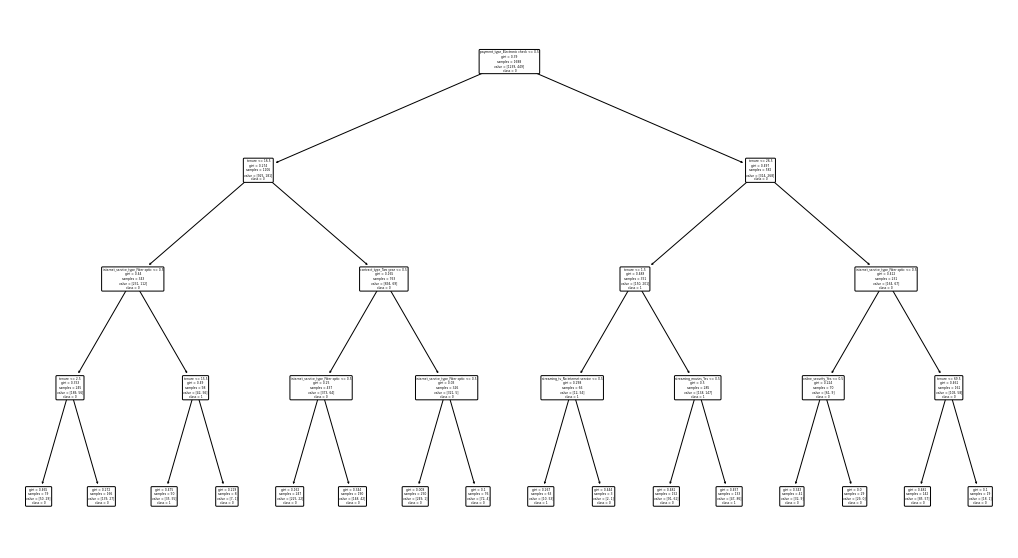

In [106]:
# MAX DEPTH: 4
# now we fit the model to the validate data
clf = DecisionTreeClassifier(max_depth=4, random_state=123)

clf = clf.fit(X_validate, Y_validate)

plt.figure(figsize=(18, 10))
plot_tree(clf, feature_names=X_validate.columns, class_names=clf.classes_.astype(str), rounded=True)

In [107]:
#make predictions:
churn_prediction = pd.DataFrame(clf.predict(X_validate))
churn_prediction.value_counts()

0    1402
1     286
dtype: int64

In [108]:
# Predict probability
churn_prediction_proba = pd.DataFrame(clf.predict_proba(X_validate))
churn_prediction_proba

,0,1
0,0.778947,0.221053
1,0.996000,0.004000
2,1.000000,0.000000
3,0.996000,0.004000
4,0.996000,0.004000
...,...,...
1683,0.947368,0.052632
1684,0.778947,0.221053
1685,0.947368,0.052632
1686,0.353383,0.646617


In [109]:
# compute accuracy
print(f"Accuracy of Decision Tree classifer on validation set: "\
        f"{clf.score(X_validate, Y_validate)}")

Accuracy of Decision Tree classifer on validation set: 0.794431279620853


In [110]:
# confusion matrix
confusion_matrix(Y_validate, churn_prediction)

Y_validate.value_counts()

labels = sorted(Y_validate.unique())

pd.DataFrame(confusion_matrix(Y_validate, churn_prediction), index=labels, columns=labels)

,0,1
0,1147,92
1,255,194


In [111]:
#classification report
print(classification_report(Y_validate, churn_prediction))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1239
           1       0.68      0.43      0.53       449

    accuracy                           0.79      1688
   macro avg       0.75      0.68      0.70      1688
weighted avg       0.78      0.79      0.78      1688



## Takeaway:

- 5 levels of depth is more accurate than 4 levels in this case:
    - 79% vs 78%

# Random Forest Exercises

Continue working in your `model` file with titanic data to do the following: 

1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

1. Evaluate your results using the model score, confusion matrix, and classification report.

1. Print and clearly label the following:  Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

1. Run through steps increasing your min_samples_leaf and decreasing your max_depth. 

1. What are the differences in the evaluation metrics?  Which performs better on your in-sample data?  Why?

After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [115]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from pydataset import data

In [116]:
import acquire
import prepare
import split

In [117]:
df = acquire.get_titanic_data()
df = prepare.prep_titanic(df)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,deck,embark_town,alone,embark_town_Queenstown,embark_town_Southampton,sex_male,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0,3,male,22.0,1,0,7.2500,NaN,Southampton,0,0,1,1,0,0,0,0,0,0
1,1,1,female,38.0,1,0,71.2833,C,Cherbourg,0,0,0,0,0,1,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,NaN,Southampton,1,0,1,0,0,0,0,0,0,0
3,1,1,female,35.0,1,0,53.1000,C,Southampton,0,0,1,0,0,1,0,0,0,0
4,0,3,male,35.0,0,0,8.0500,NaN,Southampton,1,0,1,1,0,0,0,0,0,0


In [118]:
df = df.drop(columns = ['sex', 'deck', 'embark_town'])
df.head()

,survived,pclass,age,sibsp,parch,fare,alone,embark_town_Queenstown,embark_town_Southampton,sex_male,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0,3,22.0,1,0,7.2500,0,0,1,1,0,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,1,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,1,0,0,0,0,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,1,0,0,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,1,0,0,0,0,0,0


In [ ]:
imputer = SimpleImputer(strategy='median', missing_values=np.nan)

imputer = imputer.fit(df[['age']])

df[['age']] = imputer.transform(df[['age']])

In [120]:
df.isna().sum()

survived                   0
pclass                     0
age                        0
sibsp                      0
parch                      0
fare                       0
alone                      0
embark_town_Queenstown     0
embark_town_Southampton    0
sex_male                   0
deck_B                     0
deck_C                     0
deck_D                     0
deck_E                     0
deck_F                     0
deck_G                     0
dtype: int64

In [121]:
train, validate, test = split.train_validate_test_split(df, 'survived')
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,embark_town_Queenstown,embark_town_Southampton,sex_male,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
583,0,1,36.0,0,0,40.1250,1,0,0,1,0,0,0,0,0,0
165,1,3,9.0,0,2,20.5250,0,0,1,1,0,0,0,0,0,0
50,0,3,7.0,4,1,39.6875,0,0,1,1,0,0,0,0,0,0
259,1,2,50.0,0,1,26.0000,0,0,1,0,0,0,0,0,0,0
306,1,1,28.0,0,0,110.8833,1,0,0,0,0,0,0,0,0,0


In [122]:
train.survived.mean(), validate.survived.mean(), test.survived.mean()

(0.38353413654618473, 0.38317757009345793, 0.3854748603351955)

In [123]:
#create x and y version, where y is the series with just target variable,
# and x is the series without the target variable

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

## 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [141]:
max_depth_list = []

for i in range(1, 11):
    # create the random forest object with desired hyper-parameters:
    rf = RandomForestClassifier(max_depth=i, random_state=123)
    
    # fit the random forest to the training data:
    rf.fit(X_train, y_train)
    
    # Evaluate importance, or weight, of each feature.
    rf.feature_importances_
    
    # Classify each passenger by its estimated survival.
    y_pred = rf.predict(X_train)
    
    # Estimate the probability of survival, using the training data.
    y_pred_proba = rf.predict_proba(X_train)
    # compute the estimate accuracy
    train_set_accuracy = rf.score(X_train, y_train)
    
    # Create a confusion matrix
    confusion_matrix(y_train, y_pred)
    
    # Create a classification report
    model_report = classification_report(y_train, y_pred)
    
    #evaluate on out-of-sample-date
    validate_set_accuracy = rf.score(X_validate, y_validate)
    
    max_depth_list.append({'max_depth': i,
                           'training_accuracy': train_set_accuracy,
                           'classification_report': model_report,
                          'validate_accuracy': validate_set_accuracy})

print(max_depth_list)

[{'max_depth': 1, 'training_accuracy': 0.7650602409638554, 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.73      0.99      0.84       307\n           1       0.96      0.40      0.57       191\n\n    accuracy                           0.77       498\n   macro avg       0.84      0.70      0.70       498\nweighted avg       0.82      0.77      0.73       498\n', 'validate_accuracy': 0.7523364485981309}, {'max_depth': 2, 'training_accuracy': 0.8052208835341366, 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.77      0.98      0.86       307\n           1       0.95      0.52      0.67       191\n\n    accuracy                           0.81       498\n   macro avg       0.86      0.75      0.77       498\nweighted avg       0.84      0.81      0.79       498\n', 'validate_accuracy': 0.7710280373831776}, {'max_depth': 3, 'training_accuracy': 0.8413654618473896, 'classification

In [144]:
for model in max_depth_list:
    print(f"Depth: {model['max_depth']}")
    print(f"Training Set Accuracy: {model['training_accuracy']}")
    print(f"Classification Report: {model['classification_report']}")
    print(f"Validate Set Accuracy: {model['validate_accuracy']}")
    print()

Depth: 1
Training Set Accuracy: 0.7650602409638554
Classification Report:               precision    recall  f1-score   support

           0       0.73      0.99      0.84       307
           1       0.96      0.40      0.57       191

    accuracy                           0.77       498
   macro avg       0.84      0.70      0.70       498
weighted avg       0.82      0.77      0.73       498

Validate Set Accuracy: 0.7523364485981309

Depth: 2
Training Set Accuracy: 0.8052208835341366
Classification Report:               precision    recall  f1-score   support

           0       0.77      0.98      0.86       307
           1       0.95      0.52      0.67       191

    accuracy                           0.81       498
   macro avg       0.86      0.75      0.77       498
weighted avg       0.84      0.81      0.79       498

Validate Set Accuracy: 0.7710280373831776

Depth: 3
Training Set Accuracy: 0.8413654618473896
Classification Report:               precision    recall  f1-